In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'E:/OK_&_Nok_images'

img_size = (400,400)  #as all are of average 400X400 jpg
batch_size = 35

#done the data augmentation here you can see
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 29 images belonging to 2 classes.


Found 6 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 128)       0

In [4]:
history = model.fit(
    train_generator,
    epochs=30,  # here as i have  it more for training and accuracy you can make it adjusted as needed
    validation_data=validation_generator
)


Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 0.7184 - accuracy: 0.3448 - val_loss: 8.1572 - val_accuracy: 0.6667
Epoch 2/30
1/1 [==============================] - 8s 8s/step - loss: 7.0130 - accuracy: 0.6552 - val_loss: 0.8238 - val_accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 8s 8s/step - loss: 0.7713 - accuracy: 0.6552 - val_loss: 1.8478 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 7s 7s/step - loss: 1.4080 - accuracy: 0.3448 - val_loss: 1.0845 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 7s 7s/step - loss: 0.8739 - accuracy: 0.3448 - val_loss: 0.7490 - val_accuracy: 0.3333
Epoch 6/30
1/1 [==============================] - 7s 7s/step - loss: 0.7044 - accuracy: 0.2759 - val_loss: 0.6624 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 7s 7s/step - loss: 0.6718 - accuracy: 0.6552 - val_loss: 0.6489 - val_accuracy: 0.6667
Epoch 8/30
1/1 [=======================

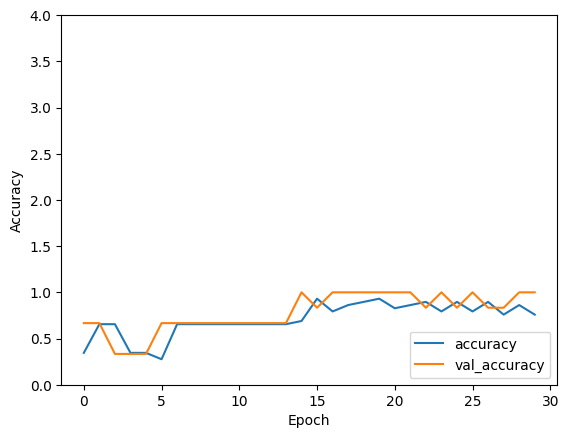

In [5]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 4])
plt.legend(loc='lower right')
plt.show()


In [6]:
# ...

test_generator = train_datagen.flow_from_directory(
    'E:/OK_&_Nok_images',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")


Found 35 images belonging to 2 classes.


1/1 [==============================] - 3s 3s/step - loss: 0.2808 - accuracy: 0.9143
Test accuracy: 0.9142857193946838


In [26]:
import numpy as np
from keras.preprocessing import image
def load_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

img_path = 'E:/OK_&_Nok_images/Ok/0827122140_ok.jpg'
img = load_image(img_path)
prediction = model.predict(img)


threshold = 0  

if prediction >= threshold:
    print("Predicted: OK")
else:
    print("Predicted: NOK")




1/1 [==============================] - 0s 208ms/step
Predicted: OK
